   # A description of the data and its origin

Origin: The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group of Université Libre de Bruxelles on big data mining and fraud detection.

- Transactions made by credit cards in September 2013 by europeans - over two days.
- 492 frauds out of 284,807 transactions
- Numerical variables / features. Where all have been PCA transformed except amount and time.
- 'Time' contains the seconds elapsed since the first transaction in the dataset. 
- The feature 'Amount' is the transaction 
- Is.Fraud is the response variable and it takes value True in case of fraud and False otherwise.


# Introductory data description and evaluation of its quality

Write something: Anonymized using PCA (Principal component analysis) transfrmation, the source, only limited time

Consequences of the imbalanced dataset: 
- If we use the data directly as is is and fit our models on this - we may achieve very high accuracy, but we will predict all results to be not Fraud

What we can do:
- Choose our performance metrics wisely - use confusion matrix to calculate Precision, Recall andF1score (weighted average of precision recall)
- Resample the data to have a 50-50 ratio of the two classes: one strategy is undersampling, which deletes instances from the over-represented class - which is used here

# Exploratory Data Analysis

In [2]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
#import data
dfall = pd.read_csv('CreditCardFraud_AllData.csv')
df1 = pd.read_csv('CreditCardFraud_1.csv')
df2 = pd.read_csv('CreditCardFraud_2.csv')
df3 = pd.read_csv('CreditCardFraud_3.csv')
df4 = pd.read_csv('CreditCardFraud_4.csv')
df5 = pd.read_csv('CreditCardFraud_5.csv')

In [4]:
#take a look at the data - choose a dataframe to look at
print(df3.head())
print(df3.shape)

   Time  Amount  Is.Fraud        V1        V2        V3        V4        V5  \
0    13    0.89     False -0.436905  0.918966  0.924591 -0.727219  0.915679   
1    82    5.90     False -0.888004  0.913670  1.146088  0.656290  0.677272   
2    89   37.13     False -0.589856  0.933070 -0.268073  0.125245  2.396992   
3   399   15.19     False  1.091666  0.068682  1.230334  2.554474 -0.454169   
4   421   12.41     False -1.397776  0.004573  2.528964  0.648279 -0.196625   

         V6        V7    ...          V19       V20       V21       V22  \
0 -0.127867  0.707642    ...     0.025436 -0.047021 -0.194796 -0.672638   
1 -0.326211  0.888811    ...     0.852984  0.142757  0.107833  0.661993   
2  3.877945  0.189985    ...     1.424510  0.401336 -0.154397 -0.174834   
3  0.915781 -0.701016    ...    -0.990732 -0.216638 -0.098440 -0.178428   
4  0.163190 -0.278296    ...     0.524410  0.056481 -0.087222  0.150044   

        V23       V24       V25       V26       V27       V28  
0 -0.15685

In [5]:
#check out the column names
print(dfall.columns)

Index(['Time', 'Amount', 'Is.Fraud', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28'],
      dtype='object')


False    284315
True        492
Name: Is.Fraud, dtype: int64


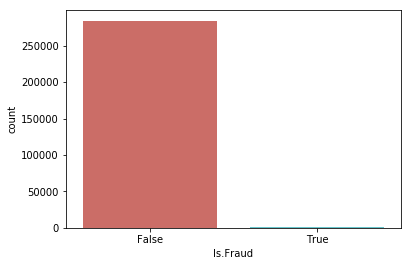

In [6]:
#count how many are of each class in original dataset: Fraud or not fraud
fraud_class = dfall['Is.Fraud'].value_counts()
print(fraud_class)
sns.countplot(x='Is.Fraud',data=dfall, palette='hls')

In [7]:
#find percentage of fraud/not fraud cases in the original dataset
print('Not fraud makes up ', round(dfall['Is.Fraud'].value_counts()[0]/len(dfall) * 100,2), '% of the data')
print('Fraud makes up', round(dfall['Is.Fraud'].value_counts()[1]/len(dfall) * 100,2), '% of the data')

Not fraud makes up  99.83 % of the data
Fraud makes up 0.17 % of the data


False    4508
True      492
Name: Is.Fraud, dtype: int64


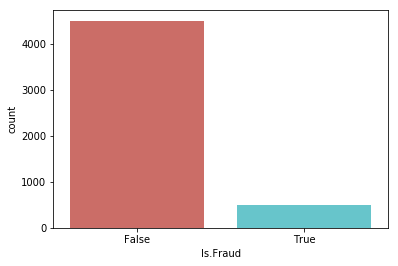

In [8]:
#count how many are of each class in subdataframe: Fraud or not fraud
fraud_class = df3['Is.Fraud'].value_counts()
print(fraud_class)
sns.countplot(x='Is.Fraud',data=df3, palette='hls')

In [9]:
#find percentage of fraud/not fraud cases in the subdataset
print('Not fraud makes up ', round(df3['Is.Fraud'].value_counts()[0]/len(df3) * 100,2), '% of the dataset')
print('Fraud makes up', round(df3['Is.Fraud'].value_counts()[1]/len(df3) * 100,2), '% of the dataset')

Not fraud makes up  90.16 % of the dataset
Fraud makes up 9.84 % of the dataset


In [10]:
df3.isnull().sum().max()

0

In [11]:
df2.describe()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,94580.083000,92.205710,-0.441423,0.335121,-0.691933,0.436959,-0.324633,-0.167393,-0.542030,0.059614,...,0.075990,0.025200,0.056153,-0.011147,-0.003100,-0.000638,-0.002807,0.000344,0.015578,0.009490
std,47660.692197,263.263533,3.132900,2.288360,3.358883,2.090319,2.394230,1.471328,3.074175,2.374235,...,0.932473,0.794412,1.373483,0.833260,0.752746,0.593973,0.556746,0.483460,0.588389,0.399351
min,111.000000,0.000000,-30.552380,-21.510079,-31.103685,-4.760971,-42.147898,-13.009119,-43.557242,-41.044261,...,-3.681904,-18.265480,-22.797604,-8.887017,-19.254328,-2.687773,-4.781606,-1.450303,-7.263482,-9.617915
25%,54242.250000,4.727500,-1.106453,-0.529002,-1.255718,-0.768251,-0.850144,-0.880297,-0.714393,-0.208165,...,-0.433069,-0.211572,-0.234338,-0.562841,-0.169483,-0.348528,-0.316521,-0.323464,-0.070984,-0.052511
50%,85499.000000,20.000000,-0.106166,0.145055,-0.011708,0.122214,-0.118451,-0.348602,-0.035150,0.034300,...,0.044165,-0.048545,-0.013918,-0.011911,-0.006237,0.037780,0.021435,-0.042572,0.005151,0.013852
75%,139640.250000,81.947500,1.275479,0.980565,0.932403,1.062363,0.566961,0.289987,0.538070,0.391012,...,0.545800,0.167994,0.233711,0.531388,0.158889,0.430487,0.356267,0.242533,0.125418,0.093751
max,172774.000000,7583.320000,2.378232,22.057729,3.486492,12.114672,19.180525,22.529298,36.677268,20.007208,...,5.228342,11.059004,27.202839,8.361985,10.475770,3.054049,3.119632,2.745261,11.135740,15.374949


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


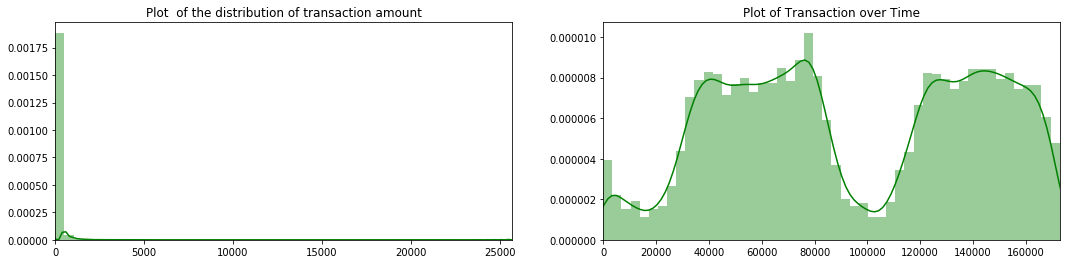

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

#get the values from the columns amount and time
amounts = dfall['Amount'].values
times = dfall['Time'].values

#Create plot for distribution of amount
sns.distplot(amounts, ax=ax[0], color='g')
ax[0].set_title('Plot  of the distribution of transaction amount', fontsize=12)
ax[0].set_xlim([min(amounts), max(amounts)])

#Create plot for transacion through time
sns.distplot(times, ax=ax[1], color='g')
ax[1].set_title('Plot of Transaction over Time', fontsize=12)
ax[1].set_xlim([min(times), max(times)])

plt.show()

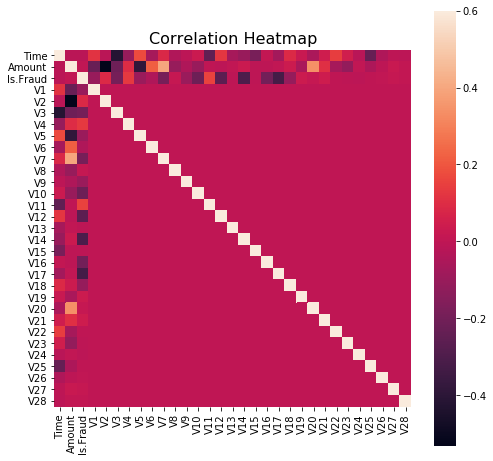

In [13]:
correlation = dfall.corr()
f , ax = plt.subplots(figsize = (8,8)) 
plt.title('Correlation Heatmap',y=1,size=16) 
sns.heatmap(correlation, square = True, vmax=0.6)

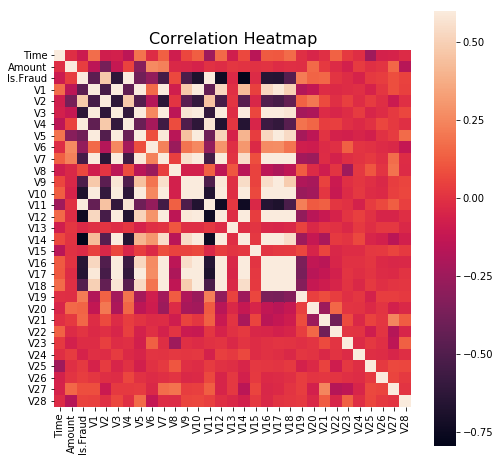

In [14]:
correlation = df2.corr()
f , ax = plt.subplots(figsize = (8,8)) 
plt.title('Correlation Heatmap',y=1,size=16) 
sns.heatmap(correlation, square = True, vmax=0.6)

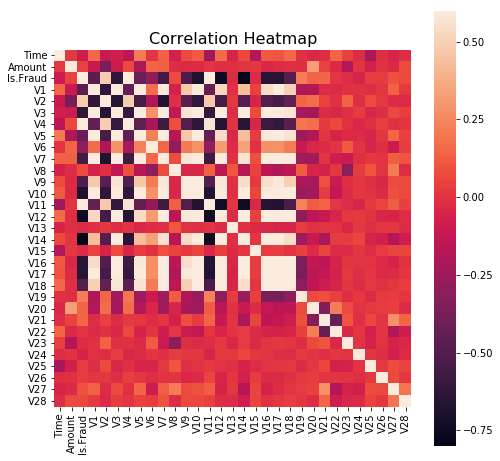

In [15]:
correlation = df3.corr()
f , ax = plt.subplots(figsize = (8,8)) 
plt.title('Correlation Heatmap',y=1,size=16) 
sns.heatmap(correlation, square = True, vmax=0.6)

In [16]:
#want to find the features which have the strongest correlation with fraud
correlation = df3.corr()['Is.Fraud'][:] 

#Make a list of the features which have a correlation with absolute value larger than 0.5 to list out
features_list = correlation[abs(correlation) > 0.5].sort_values(ascending=False)
print("There is {} values which are notably correlated with Is.Fraud:\n{}".format(len(features_list), features_list))

There is 11 values which are notably correlated with Is.Fraud:
Is.Fraud    1.000000
V11         0.668056
V4          0.648455
V9         -0.511484
V7         -0.556084
V3         -0.626626
V16        -0.650123
V17        -0.655595
V10        -0.686674
V12        -0.739767
V14        -0.799261
Name: Is.Fraud, dtype: float64


# Feature selection and model 1: Based on correlated features

In [17]:
# Need to transform the data in the columns Time and Amount for all dataframes

std_scaler = StandardScaler()

dfall['scaled_amount'] = std_scaler.fit_transform(dfall['Amount'].values.reshape(-1,1))
dfall['scaled_time'] = std_scaler.fit_transform(dfall['Time'].values.reshape(-1,1))
dfall.drop(['Time','Amount'], axis=1, inplace=True)

df1['scaled_amount'] = std_scaler.fit_transform(df1['Amount'].values.reshape(-1,1))
df1['scaled_time'] = std_scaler.fit_transform(df1['Time'].values.reshape(-1,1))
df1.drop(['Time','Amount'], axis=1, inplace=True)

df2['scaled_amount'] = std_scaler.fit_transform(df2['Amount'].values.reshape(-1,1))
df2['scaled_time'] = std_scaler.fit_transform(df2['Time'].values.reshape(-1,1))
df2.drop(['Time','Amount'], axis=1, inplace=True)

df3['scaled_amount'] = std_scaler.fit_transform(df3['Amount'].values.reshape(-1,1))
df3['scaled_time'] = std_scaler.fit_transform(df3['Time'].values.reshape(-1,1))
df3.drop(['Time','Amount'], axis=1, inplace=True)

df4['scaled_amount'] = std_scaler.fit_transform(df4['Amount'].values.reshape(-1,1))
df4['scaled_time'] = std_scaler.fit_transform(df4['Time'].values.reshape(-1,1))
df4.drop(['Time','Amount'], axis=1, inplace=True)

df5['scaled_amount'] = std_scaler.fit_transform(df5['Amount'].values.reshape(-1,1))
df5['scaled_time'] = std_scaler.fit_transform(df5['Time'].values.reshape(-1,1))
df5.drop(['Time','Amount'], axis=1, inplace=True)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConv

In [94]:
#Look at the scaled data
print(df3.head())

   Is.Fraud        V1        V2        V3        V4        V5        V6  \
0     False -0.436905  0.918966  0.924591 -0.727219  0.915679 -0.127867   
1     False -0.888004  0.913670  1.146088  0.656290  0.677272 -0.326211   
2     False -0.589856  0.933070 -0.268073  0.125245  2.396992  3.877945   
3     False  1.091666  0.068682  1.230334  2.554474 -0.454169  0.915781   
4     False -1.397776  0.004573  2.528964  0.648279 -0.196625  0.163190   

         V7        V8        V9     ...            V21       V22       V23  \
0  0.707642  0.087962 -0.665271     ...      -0.194796 -0.672638 -0.156858   
1  0.888811 -0.341848 -0.523849     ...       0.107833  0.661993 -0.004713   
2  0.189985  0.960389 -0.230000     ...      -0.154397 -0.174834 -0.201369   
3 -0.701016  0.396866  0.307571     ...      -0.098440 -0.178428  0.007277   
4 -0.278296  0.366045  0.435493     ...      -0.087222  0.150044  0.322306   

        V24       V25       V26       V27       V28  scaled_amount  \
0 -0.88838

In [18]:
# Extract the columns we want to investigate based on the correlation

names = ['Is.Fraud','V11', 'V4','V9','V7', 'V3', 'V16','V17','V10', 'V12','V14']
df_selected1 = pd.DataFrame(df1, columns=names)
df_selected2 = pd.DataFrame(df2, columns=names)
df_selected3 = pd.DataFrame(df3, columns=names)
df_selected4 = pd.DataFrame(df4, columns=names)
df_selected5 = pd.DataFrame(df5, columns=names)

In [16]:
print(df_selected3.head())

   Is.Fraud       V11        V4        V9        V7        V3       V16  \
0     False  0.324098 -0.727219 -0.665271  0.707642  0.924591  1.143174   
1     False  1.160793  0.656290 -0.523849  0.888811  1.146088 -0.180816   
2     False -0.596572  0.125245 -0.230000  0.189985 -0.268073 -0.608157   
3     False -1.410625  2.554474  0.307571 -0.701016  1.230334  0.541796   
4     False -0.678178  0.648279  0.435493 -0.278296  2.528964 -0.471960   

        V17       V10       V12       V14  
0 -0.928709 -0.737980  0.277192 -0.291896  
1 -0.749369  0.690440  0.831569 -0.018098  
2 -0.159370  0.295110 -0.118181  0.063381  
3 -0.274024  0.475235 -0.508594 -0.199105  
4  0.419925 -0.308060 -0.219642 -0.383811  


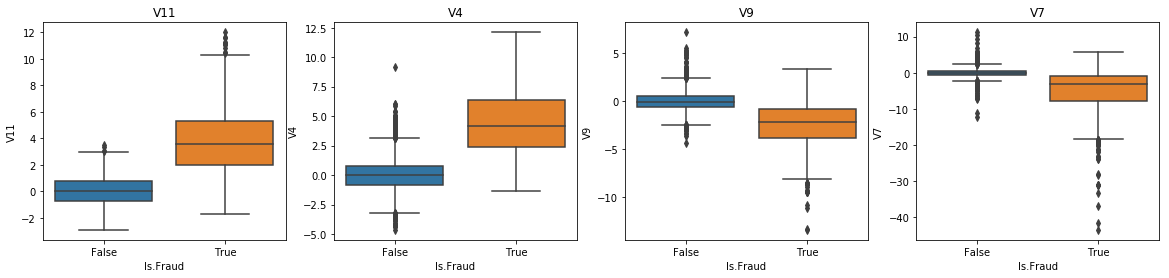

In [19]:
#plot bloxplots for 4 at a time
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Is.Fraud", y="V11", data=df_selected3, ax=axes[0])
axes[0].set_title('V11')

sns.boxplot(x="Is.Fraud", y="V4", data=df_selected3, ax=axes[1])
axes[1].set_title('V4')


sns.boxplot(x="Is.Fraud", y="V9", data=df_selected3, ax=axes[2])
axes[2].set_title('V9')


sns.boxplot(x="Is.Fraud", y="V7", data=df_selected3, ax=axes[3])
axes[3].set_title('V7')

plt.show()

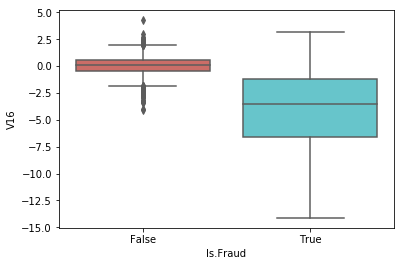

In [20]:
#One boxplot with colors to match fraud vs not fraud plot
sns.boxplot(x='Is.Fraud', y='V16', data=df_selected3, palette='hls')

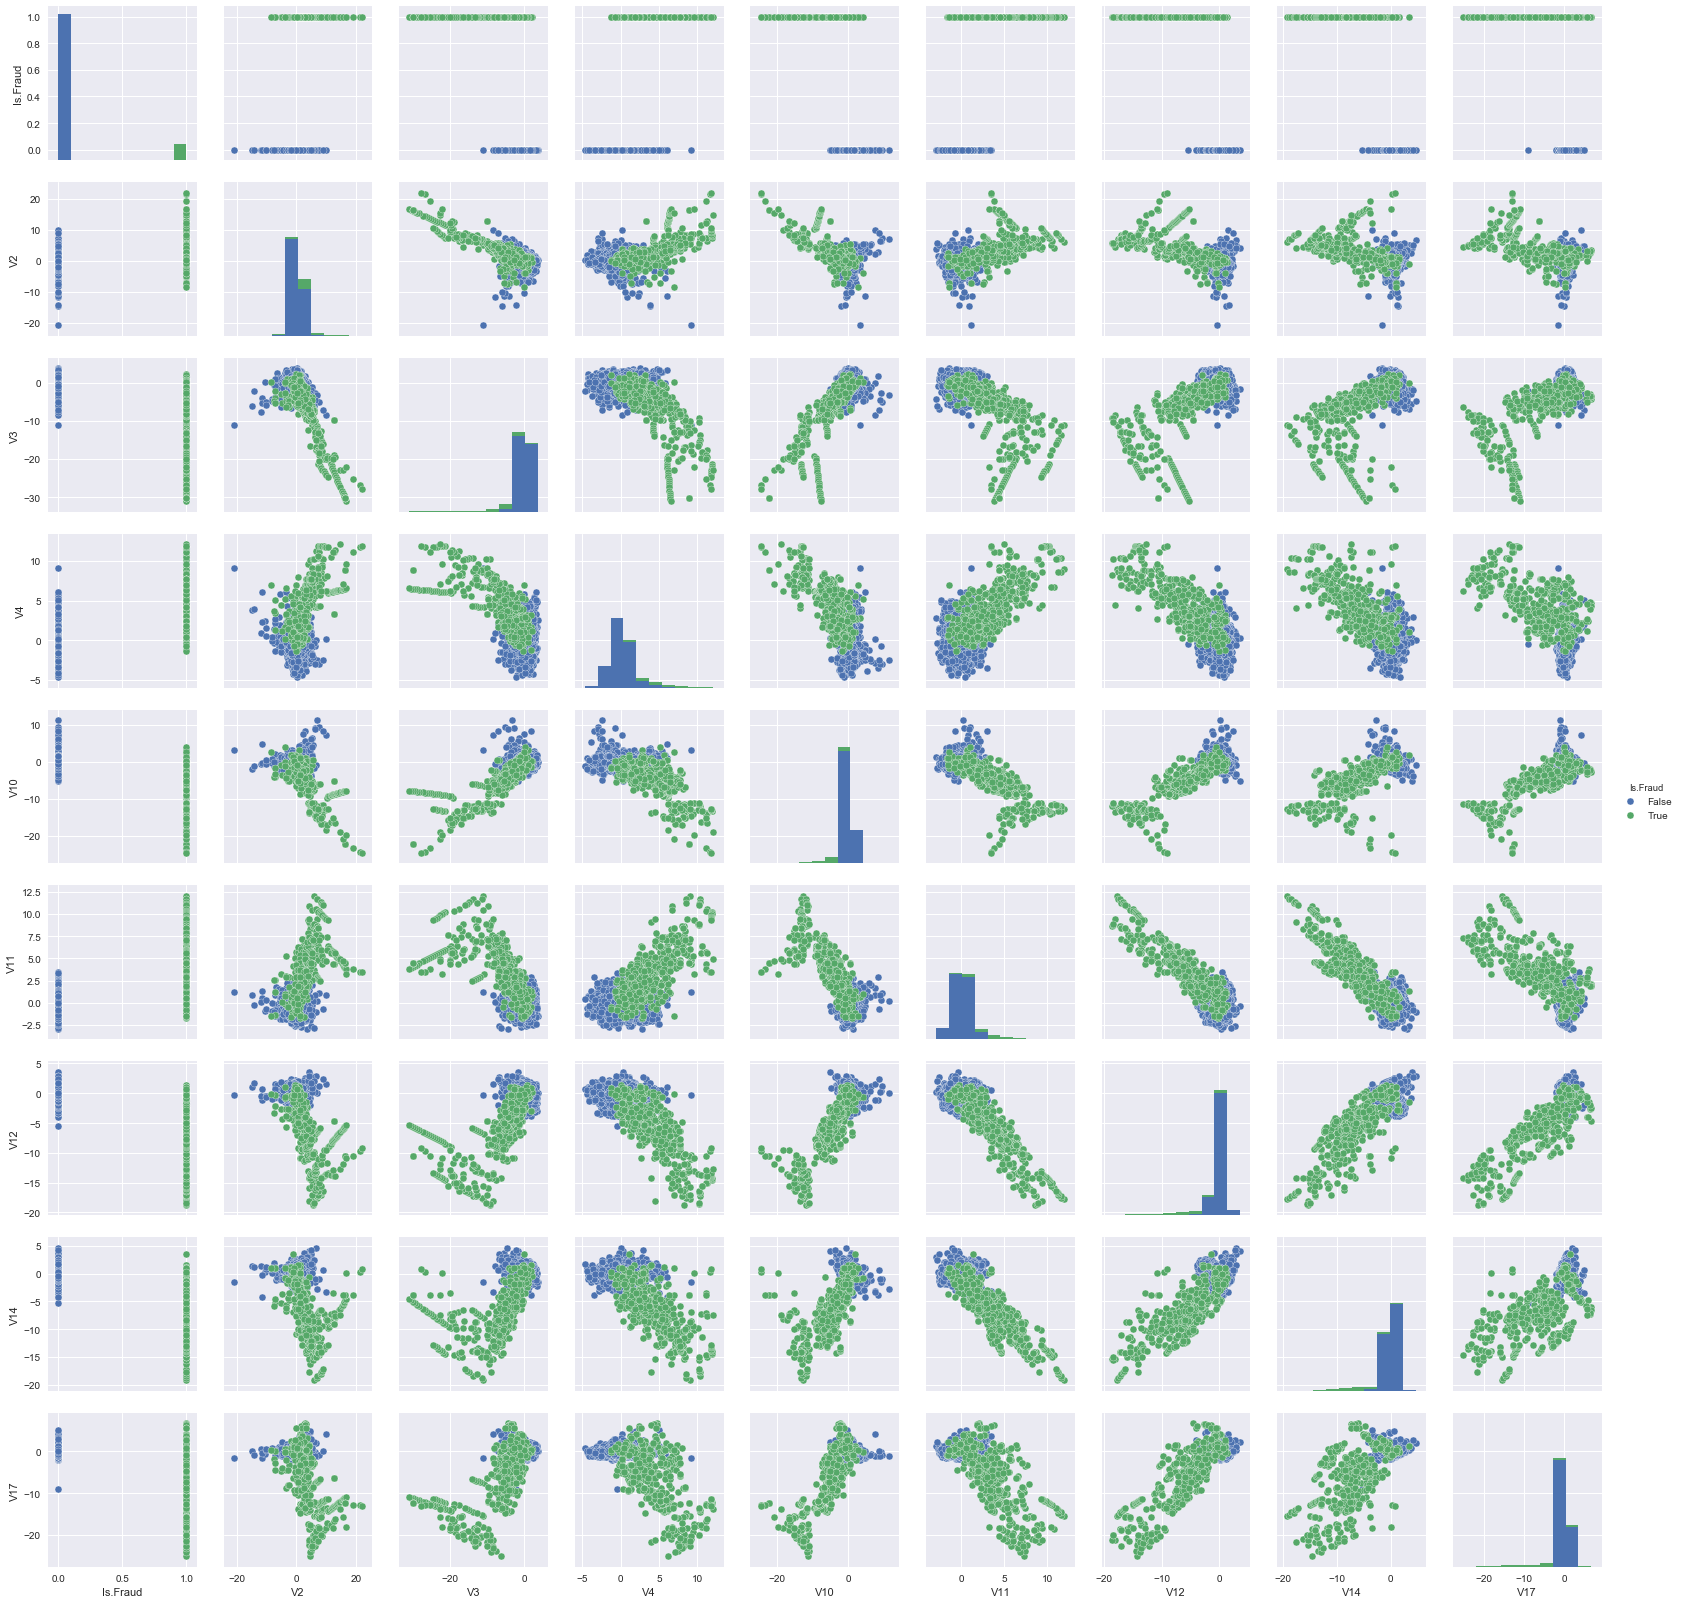

In [19]:
#pairplot to investigate relationships between variables
sns.set()
sns.pairplot(df_selected3[names], hue="Is.Fraud")
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


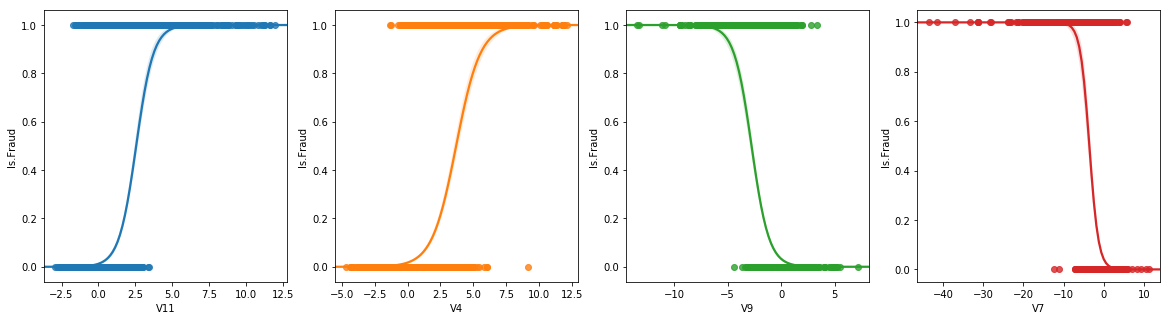

In [36]:
#Look at logisitc model for one variable at a time
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
         
plot1 = pd.concat([df_selected3[names[1]],df_selected3[names[0]]],axis = 1)
sns.regplot(x=names[1],y = names[0],data = plot1, scatter= True, logistic=True, ax=ax[0]) 
         
plot1 = pd.concat([df_selected3[names[2]],df_selected3[names[0]]],axis = 1)
sns.regplot(x=names[2],y = names[0],data = plot1, scatter= True, logistic=True, ax=ax[1])

plot1 = pd.concat([df_selected3[names[3]],df_selected3[names[0]]],axis = 1)
sns.regplot(x=names[3],y = names[0], data = plot1, scatter= True, logistic=True, ax=ax[2])

plot1 = pd.concat([df_selected3[names[4]],df_selected3[names[0]]],axis = 1)
sns.regplot(x=names[4],y = names[0], data = plot1, scatter= True, logistic=True, ax=ax[3])

# Build model

In [21]:
#Choose the columns we want to use to predict Outcome with 
train_cols = names[1:]

#We use the logit function as we are doing logistic regression
logit = sm.Logit(df_selected3['Is.Fraud'], df_selected3[train_cols]) # We fit the model
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.630819
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               Is.Fraud   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4990
Method:                           MLE   Df Model:                            9
Date:                Mon, 14 Jan 2019   Pseudo R-squ.:                 -0.9618
Time:                        15:04:59   Log-Likelihood:                -3154.1
converged:                       True   LL-Null:                       -1607.8
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V11            0.1428      0.034      4.202      0.000       0.076       0.209
V4             0.0933      0

In [22]:
print(train_cols)

['V11', 'V4', 'V9', 'V7', 'V3', 'V16', 'V17', 'V10', 'V12', 'V14']


In [23]:
X = df_selected3.iloc[:, df_selected3.columns != 'Is.Fraud']
y = df_selected3.iloc[:, df_selected3.columns == 'Is.Fraud']

In [24]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

#split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Transactions train dataset: ", len(X_train))
print("Transactions test dataset: ", len(X_test))
print("Total transactions: ", len(X_train)+len(X_test))

Transactions train dataset:  3500
Transactions test dataset:  1500
Total transactions:  5000


C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[1348    3]
 [  22  127]]


Text(0.5,257.44,'Predicted label')

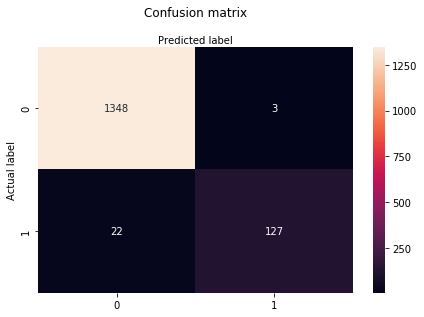

In [27]:
#Make better looking confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.98      1.00      0.99      1351
       True       0.98      0.85      0.91       149

avg / total       0.98      0.98      0.98      1500



In [30]:
#get data point where Is.Fraud is True
print(df3.loc[df3['Is.Fraud'] == True].head(1))

      Is.Fraud        V1        V2        V3        V4        V5        V6  \
4508      True -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   

            V7        V8        V9     ...            V21       V22       V23  \
4508 -2.537387  1.391657 -2.770089     ...       0.517232 -0.035049 -0.465211   

           V24       V25      V26       V27       V28  scaled_amount  \
4508  0.320198  0.044519  0.17784  0.261145 -0.143276      -0.407335   

      scaled_time  
4508    -1.967746  

[1 rows x 31 columns]


In [33]:
X = dfall[names[1:]]
y = dfall.iloc[:, dfall.columns == 'Is.Fraud']

# Split whole dataset into test and train sets
Xall_train, Xall_test, yall_train, yall_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number of transactions train dataset: ", len(Xall_train))
print("Number of transactions test dataset: ", len(Xall_test))
print("Total number of transactions: ", len(Xall_train)+len(Xall_test))

Number of transactions train dataset:  199364
Number of transactions test dataset:  85443
Total number of transactions:  284807


In [34]:
#try to predicting using the full dataset
yall_pred = logreg.predict(Xall_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(Xall_test, yall_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [33]:
from sklearn.metrics import confusion_matrix, classification_report

#Look at confusion matrix
confusion_matrix = confusion_matrix(yall_test, yall_pred)
print(confusion_matrix)
print(classification_report(yall_test, yall_pred))

[[85116   180]
 [   23   124]]
             precision    recall  f1-score   support

      False       1.00      1.00      1.00     85296
       True       0.41      0.84      0.55       147

avg / total       1.00      1.00      1.00     85443



In [1]:
#Make better looking confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

NameError: name 'plt' is not defined

# Lese 

 - http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.716.3833&rep=rep1&type=pdf
 - https://medium.com/coinmonks/handling-imbalanced-datasets-predicting-credit-card-fraud-544f5e74e0fd